1. Carga_ Toma como base el fichero titanic_train.csv y cárgalo.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Visual EDA:
   ¿Exiset algún patrón de supervivencia basado en el sexo?
   Crea el siguiente gráfico: sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
    ¿Y basado en el clase de los pasajeros (pclass)?
    Crea un histograma que represente la edad de los pasajeros.
    Contrasta la clase respecto a la edad.

<AxesSubplot:xlabel='Survived', ylabel='count'>

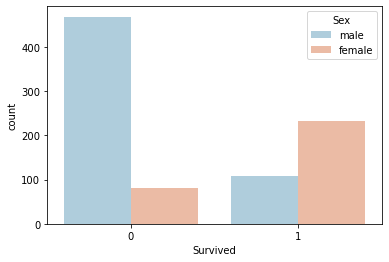

In [131]:

sns.countplot(x=df['Survived'],hue=df['Sex'],data=df,palette='RdBu_r')
#Podemos ver que había una preferencia por la supervivencia de la mujeres

<AxesSubplot:xlabel='Survived', ylabel='count'>

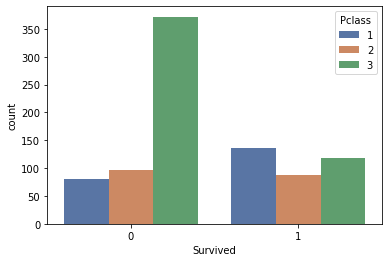

In [132]:
sns.countplot(x=df['Survived'],hue=df['Pclass'],data=df,palette='deep')

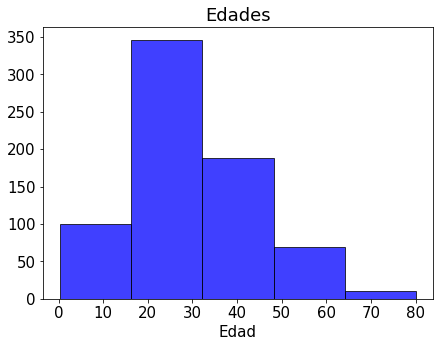

In [133]:
#  Crea un histograma que represente la edad de los pasajeros.
import numpy as np
plt.figure(figsize=(7,5))
# Main plot function 'hist'
plt.hist(df['Age'],color='blue',edgecolor='k', alpha=0.75,bins=5)
plt.title("Edades",fontsize=18)
plt.xlabel("Edad",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

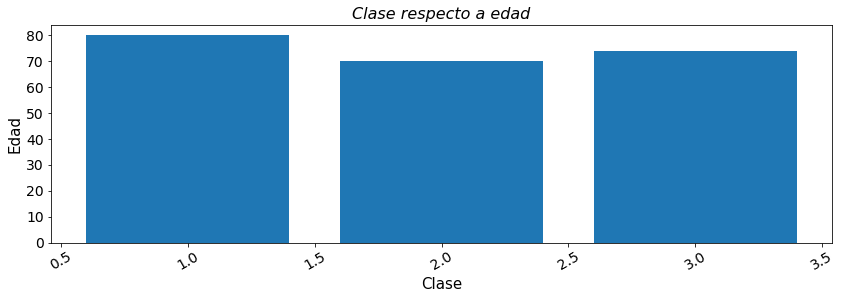

In [134]:
# Contrasta la clase respecto a la edad.
plt.figure(figsize=(14,4))
plt.title("Clase respecto a edad",fontsize=16, fontstyle='italic')
# Main plot function 'bar'
plt.bar(x=df['Pclass'],height=df['Age'])
plt.xlabel("Clase",fontsize=15)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
plt.ylabel("Edad",fontsize=15)
plt.show()


3. Preprocessing:
    Sustituye los missing values de la edad por el valor medio.
    Suprime columnas innecesarias.
    Convierte columnas categóricas por variables dummies

In [135]:
df_limpio = pd.read_csv('data/titanic_train.csv')
df_limpio['Age'].fillna(df_limpio.mean()['Age'].round(0), inplace=True)
df_limpio


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

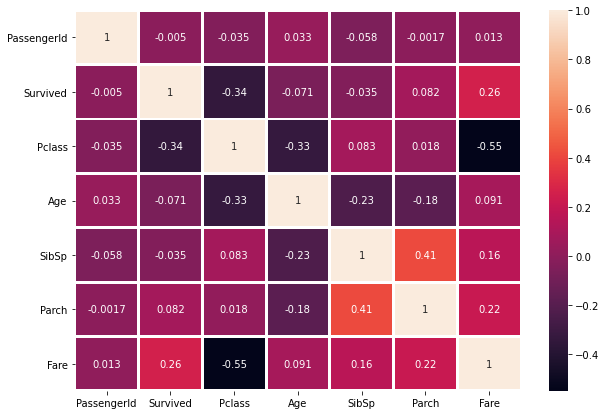

In [136]:
df_limpio.corr()
plt.figure(figsize=(10,7))
sns.heatmap(df_limpio.corr(),annot=True,linewidths=2)

In [137]:
#Suprime columnas innecesarias.
df_limpio
#Matriz de correlacion para ver relacion entre variables

#df_limpio.corr()
#plt.figure(figsize=(10,7))
#sns.heatmap(df_limpio.corr(),annot=True,linewidths=2)
df_pred = df_limpio.drop(['Name','PassengerId','Cabin','Ticket','Embarked'],axis=1,inplace=True)
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
df_limpio

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,30.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [138]:
df_dummies = pd.get_dummies(data=df_limpio)

df_dummies.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
347,1,3,30.0,1,0,16.1000,1,0
428,0,3,30.0,0,0,7.7500,0,1
667,0,3,30.0,0,0,7.7750,0,1
565,0,3,24.0,2,0,24.1500,0,1
65,1,3,30.0,1,1,15.2458,0,1
825,0,3,30.0,0,0,6.9500,0,1
700,1,1,18.0,1,0,227.5250,1,0
525,0,3,40.5,0,0,7.7500,0,1
271,1,3,25.0,0,0,0.0000,0,1
742,1,1,21.0,2,2,262.3750,1,0


4. Creación modelo de regresión logística

In [139]:
#Division del dataset
from sklearn.model_selection import train_test_split
X = df_dummies.drop('Survived',axis=1)
y = df_dummies['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (623, 7)
Test set shape (268, 7)


In [140]:
#Creacion del modelo de Regresion logistica
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(penalty='l2',solver='newton-cg')

5. Entrenamiento

In [141]:
clf1.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

6. Cálculo de probabilidades.

In [142]:
print(clf1.intercept_)
print(clf1.coef_)
print(clf1.score(X_test,y_test))

[2.94696595]
[[-0.90361891 -0.03483277 -0.29476813 -0.12569589  0.00375159  1.28499528
  -1.28499528]]
0.8134328358208955


In [143]:
#Predicciones
print(X_train)

     Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male
445       1   4.0      0      2   81.8583           0         1
650       3  30.0      0      0    7.8958           0         1
172       3   1.0      1      1   11.1333           1         0
450       2  36.0      1      2   27.7500           0         1
314       2  43.0      1      1   26.2500           0         1
..      ...   ...    ...    ...       ...         ...       ...
106       3  21.0      0      0    7.6500           1         0
270       1  30.0      0      0   31.0000           0         1
860       3  41.0      2      0   14.1083           0         1
435       1  14.0      1      2  120.0000           1         0
102       1  21.0      0      1   77.2875           0         1

[623 rows x 7 columns]


In [144]:
prob_threshold = 0.5

In [145]:
prob_df=pd.DataFrame(clf1.predict_proba(X_test[:10]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,0.921082,0.078918,0
1,0.765970,0.234030,0
2,0.847588,0.152412,0
3,0.098515,0.901485,1
4,0.314136,0.685864,1
5,0.061890,0.938110,1
6,0.376320,0.623680,1
7,0.893616,0.106384,0
8,0.270349,0.729651,1
9,0.074901,0.925099,1


In [149]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

